#New SectionGRIP : The Sparks Foundation Data Science & Business Analytics     
# Task 6 : Prediction using Decision Tree algorithm
Level : Intermediate

Author Name : Klibi Souha

Batch : November 2022

Programming Language : python

Dataset download link : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

In [27]:
!pip install --upgrade scikit-learn==0.20.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.4 MB 5.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.20.3 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.20.3 which is incompatible.


In [28]:
! pip install plotly==5.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.1 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [26]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as mt
%matplotlib inline
import matplotlib.pyplot as plt
import pydot
import sklearn.datasets as datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# *Loading and exploring the Dataset*


In [14]:
iris_set = datasets.load_iris()
iris_data = pd.DataFrame(iris_set.data, columns=iris_set.feature_names)
iris_data["species"] = iris_set.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [35]:
iris_data.isna().sum()
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

# *Data Visualization comparing various features*

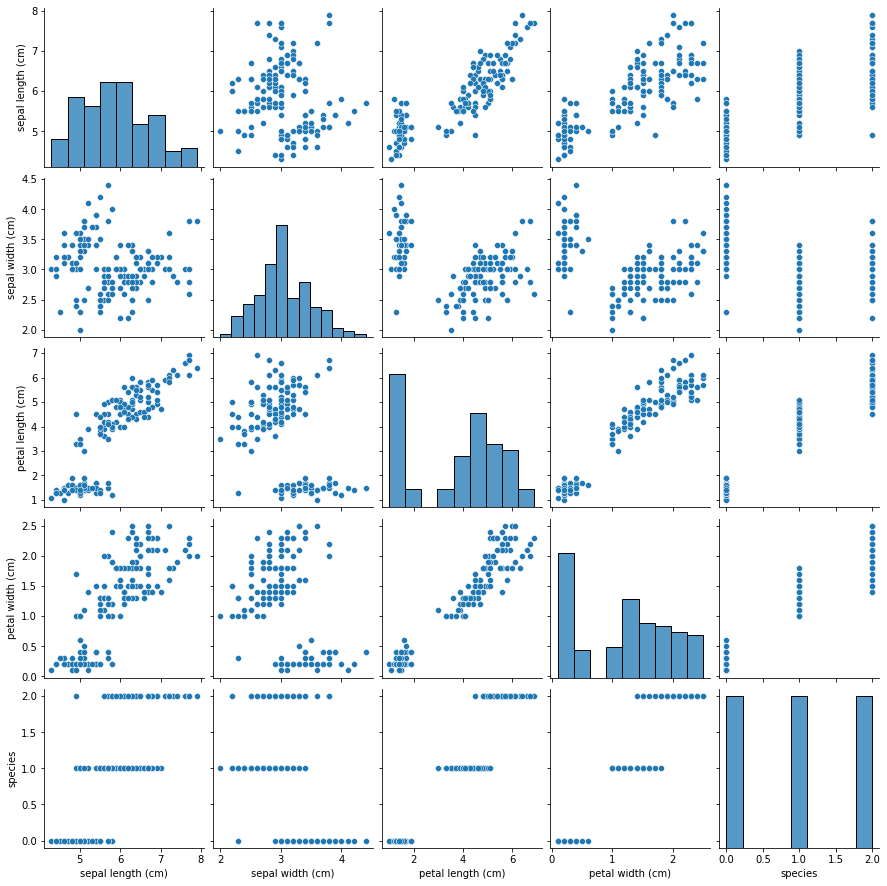

In [36]:
sns.pairplot(iris_data)

In [38]:
import plotly.express as px
fig = px.scatter_3d(iris_data, x='sepal length (cm)', y='sepal width (cm)', z='petal width (cm)',
                    color='petal length (cm)', symbol='species')
fig.show()

We can observe that speciesv "Iris Setosa" number "0" makes a distinctive cluster in every parameter, while other two species overlap a bit each other.



#*Training* And Testing Dataset

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(iris_data, test_size = 0.2)

In [16]:
train.shape, test.shape

((120, 5), (30, 5))

In [18]:
train_x = train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
train_y = train.species
test_x = test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
test_y = test.species

In [21]:
dtree = DecisionTreeClassifier()
dtree.fit(train_x,train_y)
predictions = dtree.predict(test_x)
print("The accuracy of Decision Tree is:", metrics.accuracy_score(predictions, test_y))

The accuracy of Decision Tree is: 0.9333333333333333


In [22]:
X = iris_data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
Y = iris_data.species

In [23]:
dtree1 = DecisionTreeClassifier()
dtree1.fit(X,Y)

DecisionTreeClassifier()

#Decision Tree visualization


In [24]:
!pip install pydotplus
!apt-get install graphviz -y

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [29]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

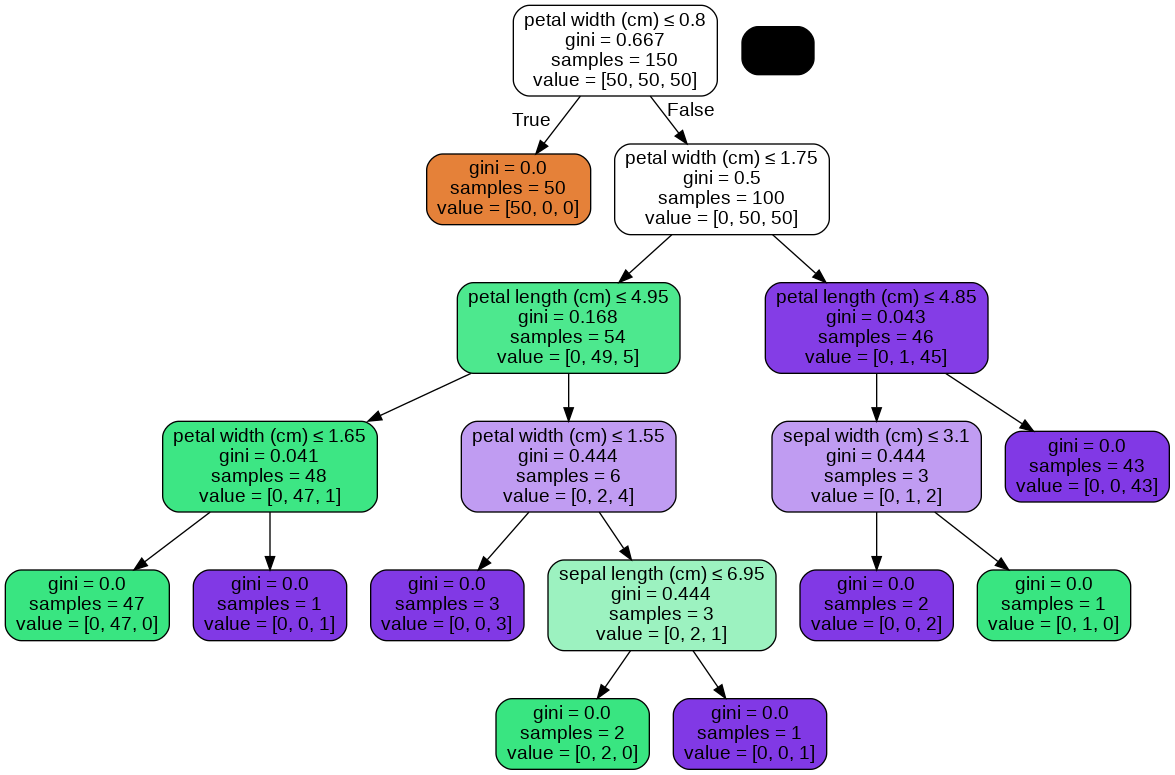

In [30]:
dot_data = StringIO()
export_graphviz(dtree1, out_file=dot_data, feature_names=iris_set.feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())